Naive Bayes 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
Data = pd.read_csv("blogs.csv")

In [2]:
Data

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [4]:
print(Data.isnull().sum())

Data      0
Labels    0
dtype: int64


In [5]:
print(Data['Labels'].value_counts())

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64


In [6]:
# seems like all the blogs are balanced by containing 100 blogs and does not have missing values 

<Axes: >

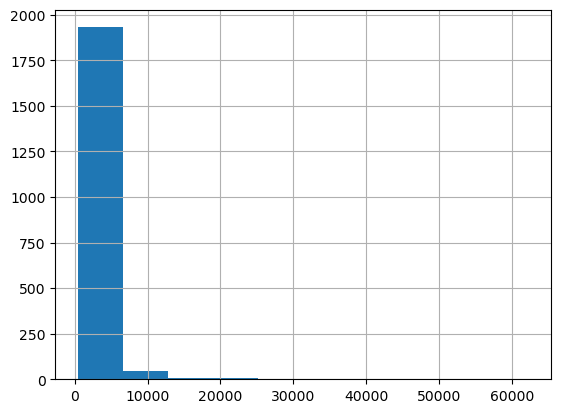

In [7]:
Data['text_length'] = Data['Data'].apply(len)
Data['text_length'].hist()

In [8]:
# Most of the blog post is small interms of characters length but there are longer posts in the dataset

In [9]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\JOSHUAVIJAYA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JOSHUAVIJAYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JOSHUAVIJAYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JOSHUAVIJAYA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess(text):
    text = text.lower()

    text = text.translate(str.maketrans('', '', string.punctuation))

    words = word_tokenize(text)

    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)
Data['Clean Data'] = Data['Data'].apply(preprocess)

In [11]:
Data

,Data,Labels,text_length,Clean Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,5972,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1336,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,3116,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,15910,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,3264,xref cantaloupesrvcscmuedu altatheism53485 tal...
...,...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,5263,xref cantaloupesrvcscmuedu talkabortion120945 ...
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,1771,xref cantaloupesrvcscmuedu talkreligionmisc837...
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,2192,xref cantaloupesrvcscmuedu talkorigins41030 ta...
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,3197,xref cantaloupesrvcscmuedu talkreligionmisc836...


In [12]:
# the dataset is cleaned, the clean data is shown in the output above

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
Data_X = vectorizer.fit_transform(Data['Clean Data']).toarray()
Data_y = Data['Labels']

In [14]:
# TF-IData is a method to convert text into numerical features

In [15]:
Data_X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
Data_y

0              alt.atheism
1              alt.atheism
2              alt.atheism
3              alt.atheism
4              alt.atheism
               ...        
1995    talk.religion.misc
1996    talk.religion.misc
1997    talk.religion.misc
1998    talk.religion.misc
1999    talk.religion.misc
Name: Labels, Length: 2000, dtype: object

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_y, test_size=0.2, random_state=40)

In [18]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

In [19]:
y_pred

array(['comp.sys.mac.hardware', 'sci.space', 'talk.politics.guns',
       'rec.sport.hockey', 'sci.med', 'talk.politics.guns', 'sci.crypt',
       'sci.crypt', 'comp.os.ms-windows.misc', 'rec.sport.baseball',
       'comp.os.ms-windows.misc', 'comp.graphics', 'talk.politics.misc',
       'talk.religion.misc', 'rec.sport.hockey', 'talk.politics.guns',
       'sci.space', 'soc.religion.christian', 'comp.graphics',
       'talk.politics.misc', 'rec.sport.baseball', 'comp.graphics',
       'talk.politics.mideast', 'sci.med', 'rec.sport.hockey',
       'sci.electronics', 'rec.sport.baseball', 'rec.sport.hockey',
       'rec.sport.baseball', 'comp.sys.mac.hardware', 'alt.atheism',
       'comp.sys.ibm.pc.hardware', 'comp.os.ms-windows.misc',
       'rec.sport.baseball', 'talk.politics.misc',
       'comp.sys.ibm.pc.hardware', 'soc.religion.christian',
       'talk.politics.guns', 'misc.forsale', 'sci.med',
       'talk.politics.mideast', 'sci.med', 'sci.electronics',
       'comp.os.ms-windo

Using naive bayes classifier as Naive Bayes classifier is a simple yet powerful probabilistic machine learning algorithm used for classification tasks, especially in text classification like spam detection, sentiment analysis, and document categorization.

In [20]:
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8225
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.72      0.76      0.74        17
           comp.graphics       0.78      0.86      0.82        21
 comp.os.ms-windows.misc       0.50      1.00      0.67        11
comp.sys.ibm.pc.hardware       0.80      0.76      0.78        21
   comp.sys.mac.hardware       0.81      1.00      0.89        17
          comp.windows.x       0.86      0.55      0.67        22
            misc.forsale       0.89      0.68      0.77        25
               rec.autos       0.95      0.95      0.95        19
         rec.motorcycles       0.76      0.87      0.81        15
      rec.sport.baseball       0.79      0.95      0.86        20
        rec.sport.hockey       1.00      1.00      1.00        19
               sci.crypt       0.88      1.00      0.94        15
         sci.electronics       0.90      0.82      0.86        22
                 sci.med       1.0

In [21]:
# accuracy is 82 % and most data of precision and recall have score above 75% which indicates good performance while some classes have less than 50% 

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
Data['Sentiment'] = Data['Data'].apply(get_sentiment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\JOSHUAVIJAYA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Using vader (Valence Aware Dictionary and sentiment Reasoner)- is best for sentiment analysis for social media as it understands slong ans emojis as well giving best score.
the SentimentIntensityAnalyzer calculates polarity scores, which we use to classify the sentiment of each blog post.

In [23]:
Data

,Data,Labels,text_length,Clean Data,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,5972,path cantaloupesrvcscmuedumagnesiumclubcccmued...,Negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1336,newsgroups altatheism path cantaloupesrvcscmue...,Positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,3116,path cantaloupesrvcscmuedudasnewsharvardedunoc...,Negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,15910,path cantaloupesrvcscmuedumagnesiumclubcccmued...,Negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,3264,xref cantaloupesrvcscmuedu altatheism53485 tal...,Positive
...,...,...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,5263,xref cantaloupesrvcscmuedu talkabortion120945 ...,Positive
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,1771,xref cantaloupesrvcscmuedu talkreligionmisc837...,Positive
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,2192,xref cantaloupesrvcscmuedu talkorigins41030 ta...,Positive
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,3197,xref cantaloupesrvcscmuedu talkreligionmisc836...,Positive


In [24]:
print(Data['Sentiment'].value_counts())
sentiment_by_category = pd.crosstab(Data['Labels'], Data['Sentiment'])
print(sentiment_by_category)

Sentiment
Positive    1334
Negative     631
Neutral       35
Name: count, dtype: int64
Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                     42        1        57
comp.graphics                   13        4        83
comp.os.ms-windows.misc         24        2        74
comp.sys.ibm.pc.hardware        21        0        79
comp.sys.mac.hardware           24        3        73
comp.windows.x                  20        2        78
misc.forsale                     7        8        85
rec.autos                       27        1        72
rec.motorcycles                 30        2        68
rec.sport.baseball              27        1        72
rec.sport.hockey                28        1        71
sci.crypt                       29        0        71
sci.electronics                 18        4        78
sci.med                         38        1        61
sci.space                       32        3      

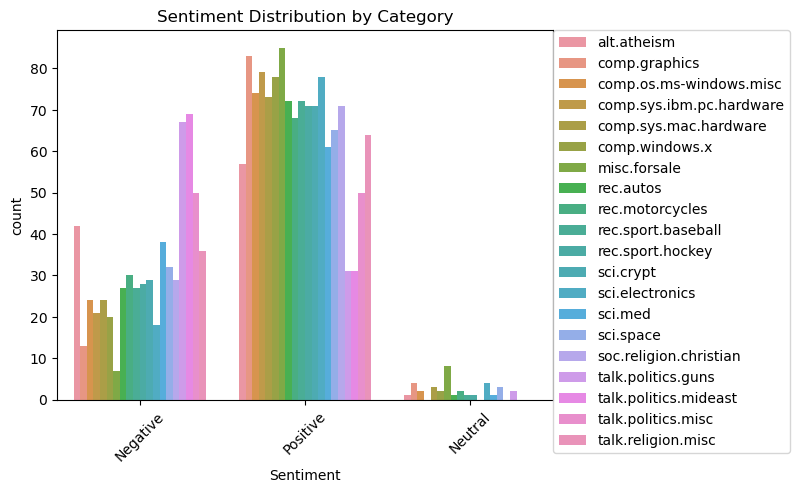

In [25]:
sns.countplot(data=Data, x='Sentiment', hue='Labels')
plt.title("Sentiment Distribution by Category")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)
plt.show()

In [26]:
# Most blogs are positive ones and negative for certain blogs are hight and neutral are less common in this dataset.

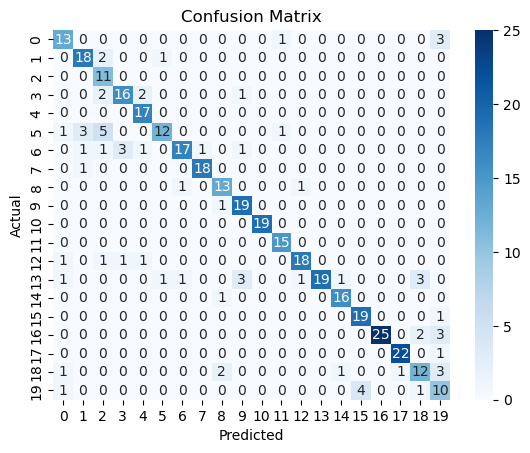

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Overall, the model performs quite well, with most classes having a high number of correct predictions. Some Misclassifications are there due to overlapping or similar content

We used the VADER sentiment analyzer because it is well-suited for social text formats like blog posts, especially given its ability to interpret informal language, slang, and emojis and applying VADER to the blog text data, each post was labeled as Positive, Negative, or Neutral. 
The Naive Bayes classifier achieved strong performance on many categories. 
The confusion matrix has diagonal dominance, indicating that the model made mostly correct predictions.